### MNIST Digit Classification using Deep Learning (Neural Network)


In [2]:
# import the necessary libraries

import numpy as np  # for creating the numpy arrays
import matplotlib.pyplot as plt    # for plottling
import seaborn as sns  # for plotting

import cv2   # for image processing task
from google.colab.patches import cv2_imshow  # to display the image
from PIL import Image  # image processing

import tensorflow as tf   # for the dl
tf.random.set_seed(3)
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.math import confusion_matrix


##### Load the MNIST data


This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. More info can be found at the MNIST homepage.

Arguments

Tuple of NumPy arrays: (x_train, y_train), (x_test, y_test).

- x_train: uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data. Pixel values range from 0 to 255.

- y_train: uint8 NumPy array of digit labels (integers in range 0-9) with shape (60000,) for the training data.

- x_test: uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data. Pixel values range from 0 to 255.

- y_test: uint8 NumPy array of digit labels (integers in range 0-9) with shape (10000,) for the test data.

In [3]:
 (x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
type(x_train)

numpy.ndarray

In [6]:
# check the shape of the arrays
print((x_train.shape, y_train.shape), (x_test.shape, y_test.shape))

((60000, 28, 28), (60000,)) ((10000, 28, 28), (10000,))


In [55]:
# print an image from the train data

# print(x_train[32])

# print(x_train[32].shape)

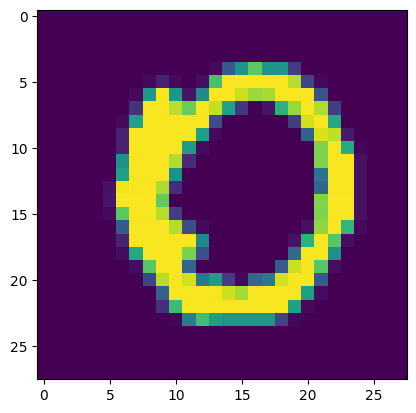

0


In [16]:
# display the image and label to check the data

plt.imshow(x_train[4444])
plt.show()

# print the label of the image
print(y_train[4444])

##### Image Label

In [13]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [15]:
# unique value in y_train and y_test

print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We will be be using these label as is it and all the image have the same dimesion in the data , so no need to preprocess the data it's already done



##### Scaling the data : to make the data into a same range
- since the pixcel of the image is between 0-255 so that's why we divided by 255

In [17]:
### scaling

x_train = x_train/255
x_test = x_test/255

## Building the Neural Network

In [20]:
# setting up the layer for the neural network
model = keras.Sequential([                    # we nned to add 3 for the coloured image
                          keras.layers.Flatten(input_shape = (28, 28)),   # to convert matric into a single array, 1-d array
                          keras.layers.Dense(50, activation='relu'),    # for the activation function of the layers
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation = 'sigmoid'),   # the number of classes in our label that why we use 10 neuron because 0-9 labels


])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
## complining the neural network

model.compile(optimizer='adam',    # best parameters for the model which have the good accuracy
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

### Training the model

In [22]:
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8402 - loss: 0.5297
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9550 - loss: 0.1512
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9674 - loss: 0.1070
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9749 - loss: 0.0824
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9793 - loss: 0.0660
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9834 - loss: 0.0549
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9864 - loss: 0.0456
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9875 - loss: 0.0394
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9893 - loss: 0.0348
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9903 - loss: 0.0306
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9918 - loss: 0.0257
Epoch 12/20
1875/1875 ━━━━━━━━

#### Training data accuracy = 99.44 %

## Model Evavulation

- #### Accuracy on the test data

In [26]:
loss, accuracy = model.evaluate(x_test, y_test)

print("Test data Accuracy ", accuracy)

print("Loss function for test data ", loss)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9616 - loss: 0.1910
Test data Accuracy  0.9660999774932861
Loss function for test data  0.17069301009178162


#### Test data accuracy = 96.60 %

In [27]:
x_test.shape

(10000, 28, 28)

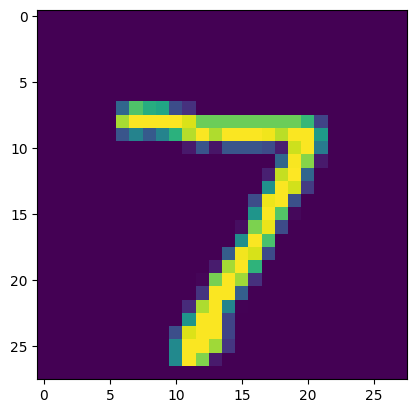

In [28]:
# display the first data point/image

plt.imshow(x_test[0])
plt.show()

In [31]:
# print the y_label / true label

print(y_test[0])

7


In [32]:
# make the predictions for all the x_test

y_preds = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [33]:
y_preds.shape

(10000, 10)

In [34]:
y_preds[0]

array([2.4343391e-01, 1.7908233e-05, 9.4759098e-04, 4.8520744e-01,
       8.3311497e-10, 1.5462567e-06, 4.6958853e-14, 9.9999976e-01,
       5.1723346e-03, 9.7374356e-01], dtype=float32)

#### Model.predict gives the prediction probability for each class for the particular data points

In [38]:
## changing the prediciotn probability to class labels

label_for_first_image = np.argmax(y_preds[0])  # index of the max number into an array we use argmax
label_for_first_image
# this is the correct predictions made by the model and which has given us the max value as 7 index

7

#### Converting the prediction probability for the class label

In [54]:
y_preds_label = [np.argmax(i) for i in y_preds]

# y_preds_label

In [44]:
y_preds   # this is the prediction probability

array([[2.4343391e-01, 1.7908233e-05, 9.4759098e-04, ..., 9.9999976e-01,
        5.1723346e-03, 9.7374356e-01],
       [8.5386826e-04, 3.6075702e-09, 9.9999988e-01, ..., 4.7000007e-13,
        4.5839147e-06, 9.2910646e-08],
       [1.7714977e-03, 9.9906570e-01, 8.2003795e-02, ..., 1.4039730e-01,
        7.6358008e-01, 1.4807657e-07],
       ...,
       [1.4592689e-07, 2.9252013e-07, 9.3104452e-10, ..., 2.7992580e-02,
        1.8169385e-04, 3.2584096e-04],
       [1.5891804e-03, 1.6471209e-12, 1.1967452e-07, ..., 2.1058321e-08,
        9.9656361e-01, 2.7302851e-11],
       [2.8299430e-04, 1.1575891e-11, 3.4397775e-03, ..., 9.4790267e-13,
        3.1050589e-05, 1.0204490e-11]], dtype=float32)

y_test --> True Labels

y_preds_label --> Predicted Labels

#### Confusion matric

In [46]:
cf_matrix = confusion_matrix(y_test, y_preds_label)
                              # true label, predicted label

cf_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    0,    1,    0,    0,    0,    6,    0,    2,    2],
       [   0, 1118,    3,    3,    0,    0,    5,    0,    6,    0],
       [  11,    0,  985,    2,    2,    2,    3,    7,   18,    2],
       [   2,    0,    6,  963,    0,    7,    0,    6,   15,   11],
       [   3,    0,    0,    0,  960,    0,    8,    1,    2,    8],
       [   2,    0,    0,   10,    1,  850,   12,    1,   13,    3],
       [   9,    2,    2,    1,    2,    0,  938,    1,    3,    0],
       [   3,    4,    8,    1,    4,    1,    0,  979,    5,   23],
       [  12,    1,    1,    2,    1,    1,    9,    2,  941,    4],
       [   6,    3,    0,    5,   18,    2,    3,    2,   12,  958]],
      dtype=int32)>

Text(0.5, 47.7222222222222, 'Predicted Labels')

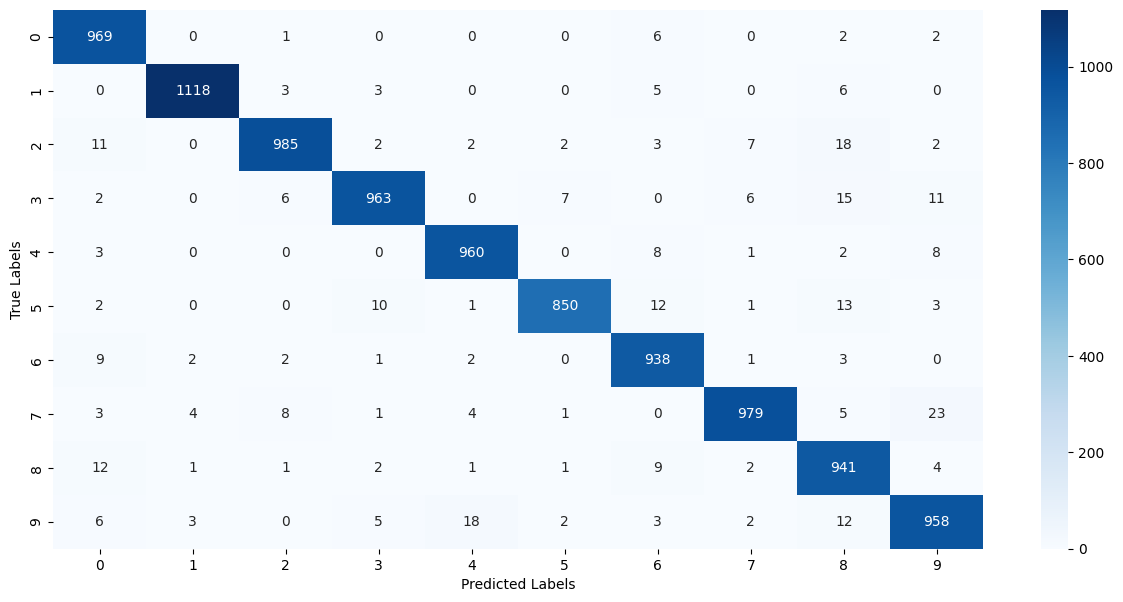

In [50]:
# for the ease of understaning  we will create a heatmap

plt.figure(figsize=(15, 7))
sns.heatmap(cf_matrix, annot=True, fmt= 'd', cmap = 'Blues')
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")

## Building the prediction system
- when we feed any other/ new image to make the presictions

In [60]:
# input the image and read the image

image_path = '/content/img.png'
cv2.imread(image_path)

# converting into the numpy array and preprocess image
input_image = cv2.imread(image_path)
# input_image.shape


# convert the image to gray scale and reshape it
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
# to check
# grayscale.shape : there will be no third parameter of 3


# to resize the input image
input_image_resize = cv2.resize(grayscale, dsize=(28, 28))
# to check the shape
# input_image_resize.shape : there will resized the image

# scale the image
input_image_resize = input_image_resize/255


# image reshape
image_reshaped = np.reshape(input_image_resize, [1, 28, 28])  # only for 1 image of the  size of 28x28 that's why we used

# prediction
input_image_perdict = model.predict(image_reshaped)
print(input_image_perdict)  # this is the probability
# to find the label
input_pred_label = np.argmax(input_image_perdict)
print(input_pred_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[5.2535732e-08 1.9534613e-35 9.5571446e-01 2.0002045e-21 0.0000000e+00
  1.0000000e+00 2.1394497e-07 4.8531663e-16 2.3857148e-02 1.8626809e-15]]
5


In [ ]:
# display the image from the numpy array
# input